#Import necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix



#Load the Dataset:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/NM_dataset.csv')
df.shape

(2879, 11)

Details of dataset:

In [4]:
df.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,38,01-02-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN


In [5]:
df.tail()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
2874,773,12-03-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,18.0,102.0,NaN
2875,773,12-10-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",12.0,14.0,91.0,NaN
2876,773,17-12-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",19.0,22.0,100.0,NaN
2877,773,24-12-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,17.0,95.0,NaN
2878,773,31-12-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",14.0,16.0,94.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Stn Code                        2879 non-null   int64  
 1   Sampling Date                   2879 non-null   object 
 2   State                           2879 non-null   object 
 3   City/Town/Village/Area          2879 non-null   object 
 4   Location of Monitoring Station  2879 non-null   object 
 5   Agency                          2879 non-null   object 
 6   Type of Location                2879 non-null   object 
 7   SO2                             2868 non-null   float64
 8   NO2                             2866 non-null   float64
 9   RSPM/PM10                       2875 non-null   float64
 10  PM 2.5                          0 non-null      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 247.5+ KB


#Data Pre-processing:

In [7]:
df.describe()

,Stn Code,SO2,NO2,RSPM/PM10,PM 2.5
count,2879.000000,2868.000000,2866.000000,2875.000000,0.0
mean,475.750261,11.503138,22.136776,62.494261,NaN
std,277.675577,5.051702,7.128694,31.368745,NaN
min,38.000000,2.000000,5.000000,12.000000,NaN
25%,238.000000,8.000000,17.000000,41.000000,NaN
50%,366.000000,12.000000,22.000000,55.000000,NaN
75%,764.000000,15.000000,25.000000,78.000000,NaN
max,773.000000,49.000000,71.000000,269.000000,NaN


In [8]:
df.isnull().sum()

Stn Code                             0
Sampling Date                        0
State                                0
City/Town/Village/Area               0
Location of Monitoring Station       0
Agency                               0
Type of Location                     0
SO2                                 11
NO2                                 13
RSPM/PM10                            4
PM 2.5                            2879
dtype: int64

Drop the column PM 2.5( having full of NaN values)

In [9]:
df.drop(['PM 2.5'], axis='columns', inplace=True)
df.isnull().sum()

Stn Code                           0
Sampling Date                      0
State                              0
City/Town/Village/Area             0
Location of Monitoring Station     0
Agency                             0
Type of Location                   0
SO2                               11
NO2                               13
RSPM/PM10                          4
dtype: int64

Replace missing values by mean:

In [10]:
df['SO2'].fillna(df['SO2'].mean(),inplace=True)
df['NO2'].fillna(df['NO2'].mean(), inplace=True)
df['RSPM/PM10'].fillna(df['RSPM/PM10'].mean(),inplace=True)

df.isnull().sum()

Stn Code                          0
Sampling Date                     0
State                             0
City/Town/Village/Area            0
Location of Monitoring Station    0
Agency                            0
Type of Location                  0
SO2                               0
NO2                               0
RSPM/PM10                         0
dtype: int64

In [11]:
sum(df.duplicated())

0

EDA

In [12]:
df.rename(columns={'Type of Location': 'TypeofLocation'}, inplace=True)
pd. crosstab(df.SO2,df.TypeofLocation)
pd. crosstab(df.NO2,df.TypeofLocation)

TypeofLocation,Industrial Area,"Residential, Rural and other Areas"
NO2,,
5.000000,0,1
6.000000,0,1
7.000000,1,1
8.000000,0,2
9.000000,1,3
10.000000,5,11
11.000000,7,23
12.000000,23,26
13.000000,47,56


In [13]:

selected_columns = df[['SO2',	'NO2',	'RSPM/PM10']]
print("Head\n",selected_columns.head())
print("Tail\n",selected_columns.tail())


Head
     SO2   NO2  RSPM/PM10
0  11.0  17.0       55.0
1  13.0  17.0       45.0
2  12.0  18.0       50.0
3  15.0  16.0       46.0
4  13.0  14.0       42.0
Tail
        SO2   NO2  RSPM/PM10
2874  15.0  18.0      102.0
2875  12.0  14.0       91.0
2876  19.0  22.0      100.0
2877  15.0  17.0       95.0
2878  14.0  16.0       94.0


#Visualizations and Analysis:

Mean Pollution Levels by City/Town/Village/Area

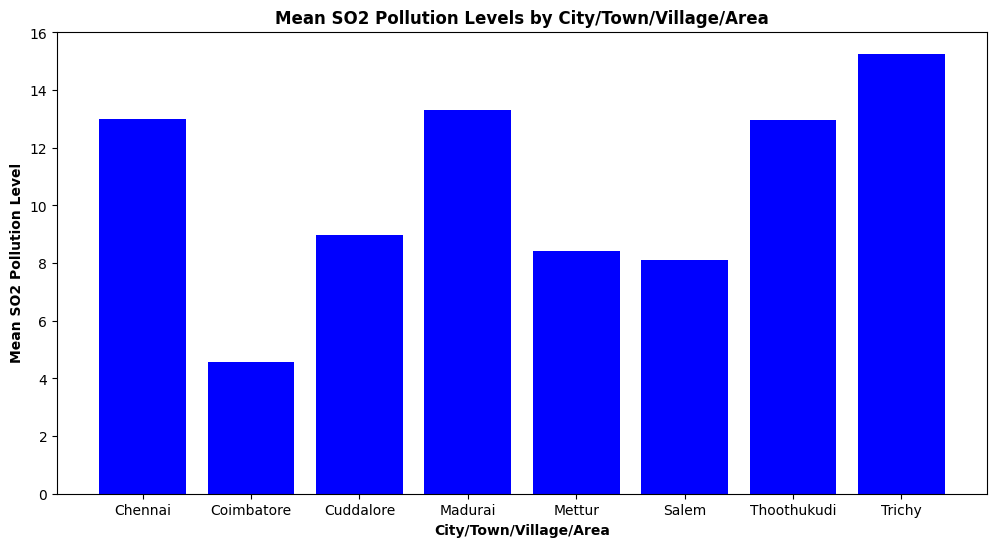

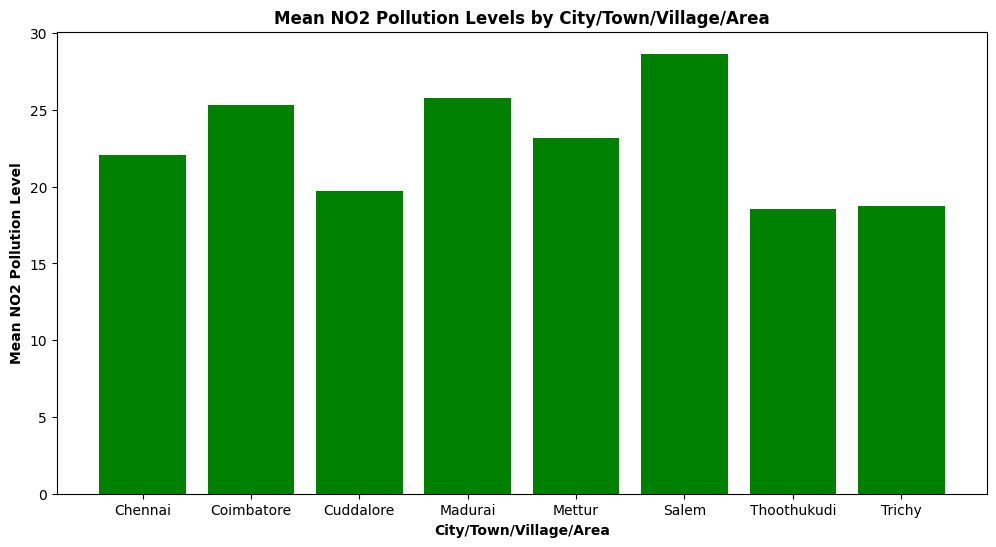

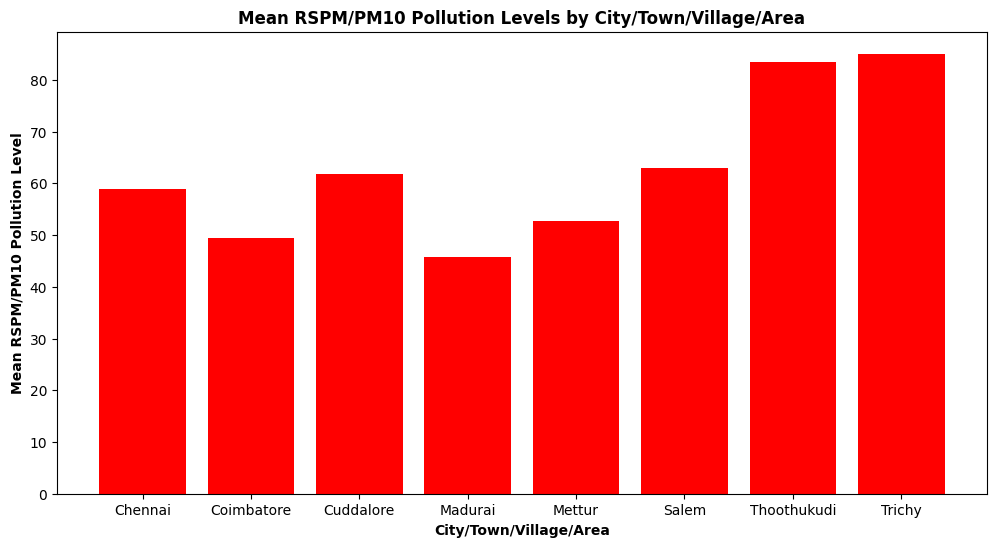

In [14]:
data = df

# Calculate the mean values for each pollutant
mean_so2 = data.groupby("City/Town/Village/Area")["SO2"].mean()
mean_no2 = data.groupby("City/Town/Village/Area")["NO2"].mean()
mean_rspm = data.groupby("City/Town/Village/Area")["RSPM/PM10"].mean()

# Create  visualization for SO2
plt.figure(figsize=(12, 6))
plt.bar(mean_so2.index, mean_so2, color="blue")

plt.title("Mean SO2 Pollution Levels by City/Town/Village/Area",fontweight='bold')
plt.xlabel("City/Town/Village/Area",fontweight='bold')
plt.ylabel("Mean SO2 Pollution Level",fontweight='bold')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

plt.show()
print("\n\n\n")

# Create  visualization for NO2
plt.figure(figsize=(12, 6))
plt.bar(mean_no2.index, mean_no2, color="green")

plt.title("Mean NO2 Pollution Levels by City/Town/Village/Area",fontweight='bold')
plt.xlabel("City/Town/Village/Area",fontweight='bold')
plt.ylabel("Mean NO2 Pollution Level",fontweight='bold')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

plt.show()
print("\n\n\n")

# Create  visualization for RSPM/PM10
plt.figure(figsize=(12, 6))
plt.bar(mean_rspm.index, mean_rspm, color="red")

plt.title("Mean RSPM/PM10 Pollution Levels by City/Town/Village/Area",fontweight='bold')
plt.xlabel("City/Town/Village/Area",fontweight='bold')
plt.ylabel("Mean RSPM/PM10 Pollution Level",fontweight='bold')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

plt.show()


<ipython-input-15-bcdae3b9b2b1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  area_mean = data.groupby('City/Town/Village/Area').mean()


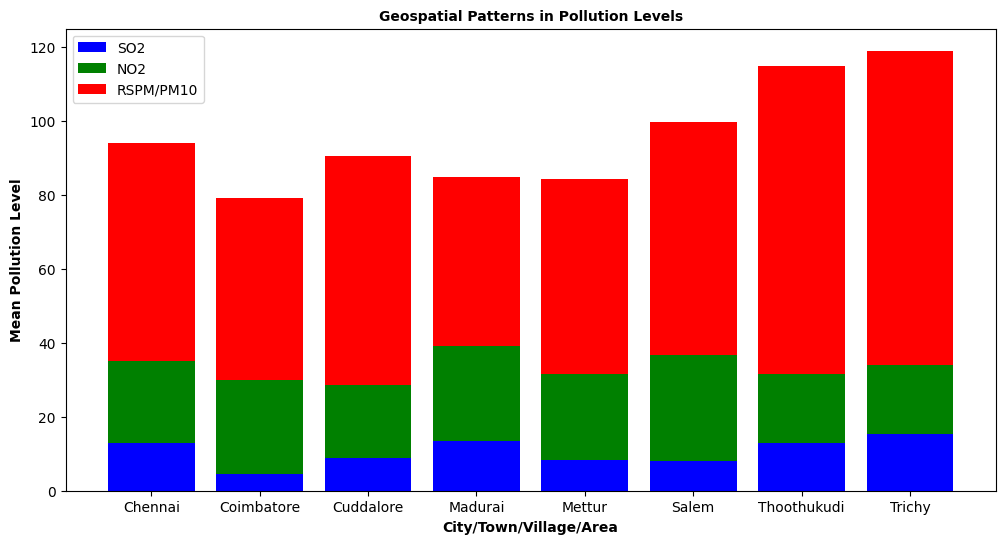

In [15]:
# Group data by 'City/Town/Village/Area' and calculate the mean pollution levels
area_mean = data.groupby('City/Town/Village/Area').mean()

# Plot a bar chart for mean pollution levels in different areas
plt.figure(figsize=(12, 6))
plt.bar(area_mean.index, area_mean['SO2'], color='blue', label='SO2')
plt.bar(area_mean.index, area_mean['NO2'], color='green', label='NO2', bottom=area_mean['SO2'])
plt.bar(area_mean.index, area_mean['RSPM/PM10'], color='red', label='RSPM/PM10', bottom=area_mean['SO2'] + area_mean['NO2'])

plt.title('Geospatial Patterns in Pollution Levels',fontsize=10, fontweight='bold', color='black')
plt.xlabel('City/Town/Village/Area',fontsize=10, fontweight='bold', color='black')
plt.ylabel('Mean Pollution Level',fontsize=10, fontweight='bold', color='black')
plt.xticks(rotation=0)
plt.legend()
plt.show()


Count of pollution,high pollution areas by location (City/Town/Village/Area) :

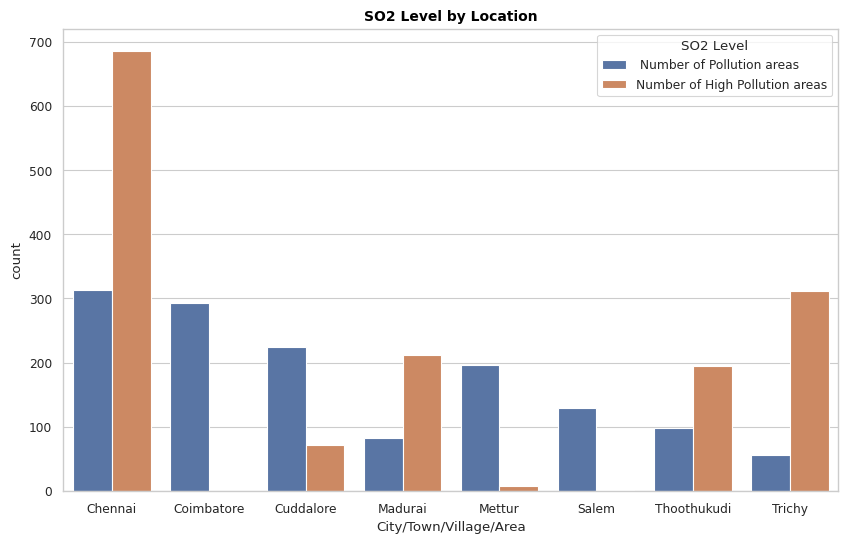

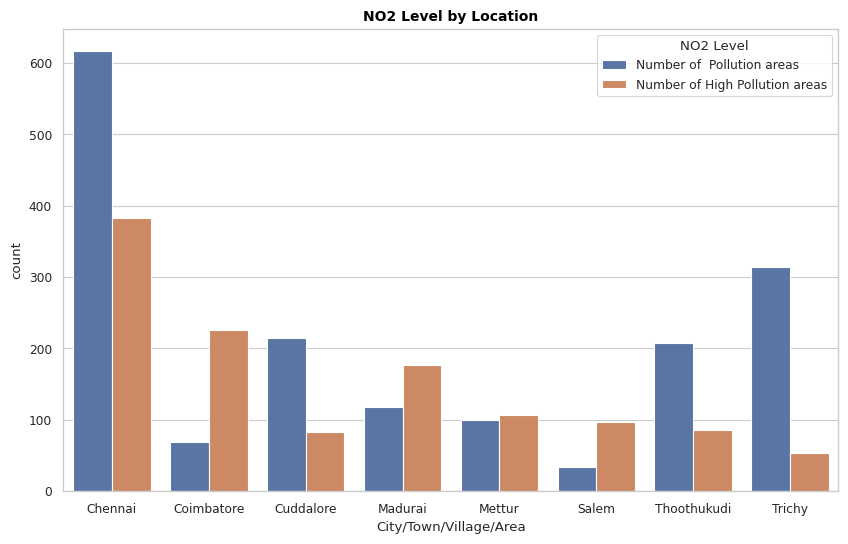

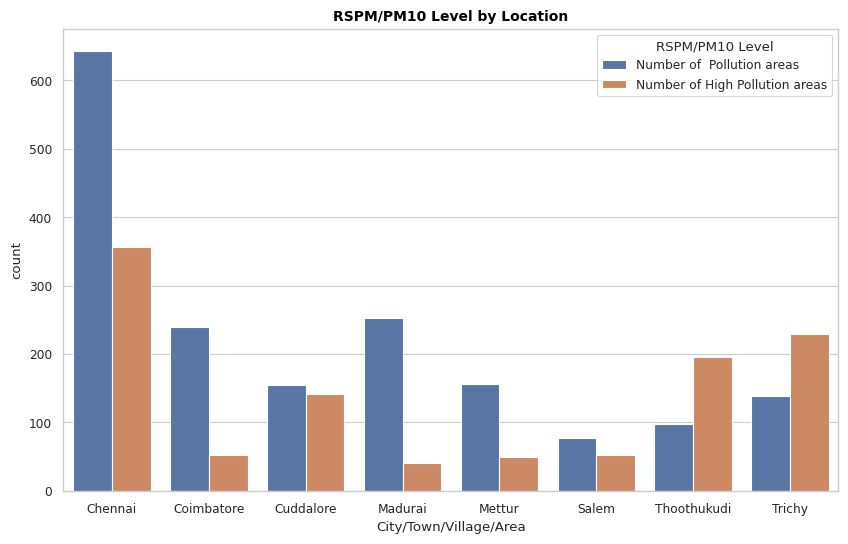

In [16]:
data1=df
# Calculate the mean values for each pollutant
so2_mean = data1["SO2"].mean()
no2_mean = data1["NO2"].mean()
rspm_mean = data1["RSPM/PM10"].mean()

# Function to categorize pollution levels for each pollutant based on mean
def categorize_so2_level(so2):
    if so2 <= so2_mean:
        return " Number of Pollution areas"
    else:
        return "Number of High Pollution areas"

def categorize_no2_level(no2):
    if no2 <= no2_mean:
        return "Number of  Pollution areas"
    else:
        return "Number of High Pollution areas"

def categorize_rspm_level(rspm):
    if rspm <= rspm_mean:
        return "Number of  Pollution areas"
    else:
        return "Number of High Pollution areas"

# Create separate columns for each pollutant's category
data1["SO2 Level"] = data1["SO2"].apply(categorize_so2_level)
data1["NO2 Level"] = data1["NO2"].apply(categorize_no2_level)
data1["RSPM/PM10 Level"] = data1["RSPM/PM10"].apply(categorize_rspm_level)

# Set the style and context for the plots
sns.set(style="whitegrid")
sns.set_context("paper")

# Visualize the results based on location (City/Town/Village/Area)
plt.figure(figsize=(10, 6))

# Grouped bar plot for SO2 Level by Location
sns.countplot(data=data1, x="City/Town/Village/Area", hue="SO2 Level")
plt.title("SO2 Level by Location",fontsize=10, fontweight='bold', color='black')
plt.show()
print("\n\n\n")

# Create a new figure for the NO2 Level
plt.figure(figsize=(10, 6))

# Grouped bar plot for NO2 Level by Location
sns.countplot(data=data, x="City/Town/Village/Area", hue="NO2 Level")
plt.title("NO2 Level by Location",fontsize=10, fontweight='bold', color='black')
plt.show()
print("\n\n\n")

# Create a new figure for the RSPM/PM10 Level
plt.figure(figsize=(10, 6))

# Grouped bar plot for RSPM/PM10 Level by Location
sns.countplot(data=data1, x="City/Town/Village/Area", hue="RSPM/PM10 Level")
plt.title("RSPM/PM10 Level by Location",fontsize=10, fontweight='bold', color='black')
plt.show()


Distribution of Pollutants-TamilNadu

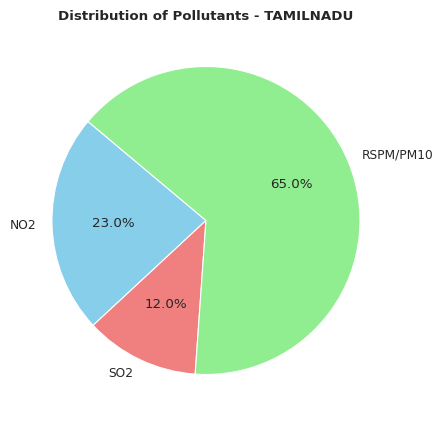

In [17]:
pollutants = ['NO2', 'SO2', 'RSPM/PM10']
pollutant_data = data[pollutants]
pollutant_totals = pollutant_data.sum()
plt.figure(figsize=(5, 5))
plt.pie(pollutant_totals, labels=pollutants, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Pollutants - TAMILNADU',fontweight='bold')
plt.show()

Distribytion of pollutants in various locations:

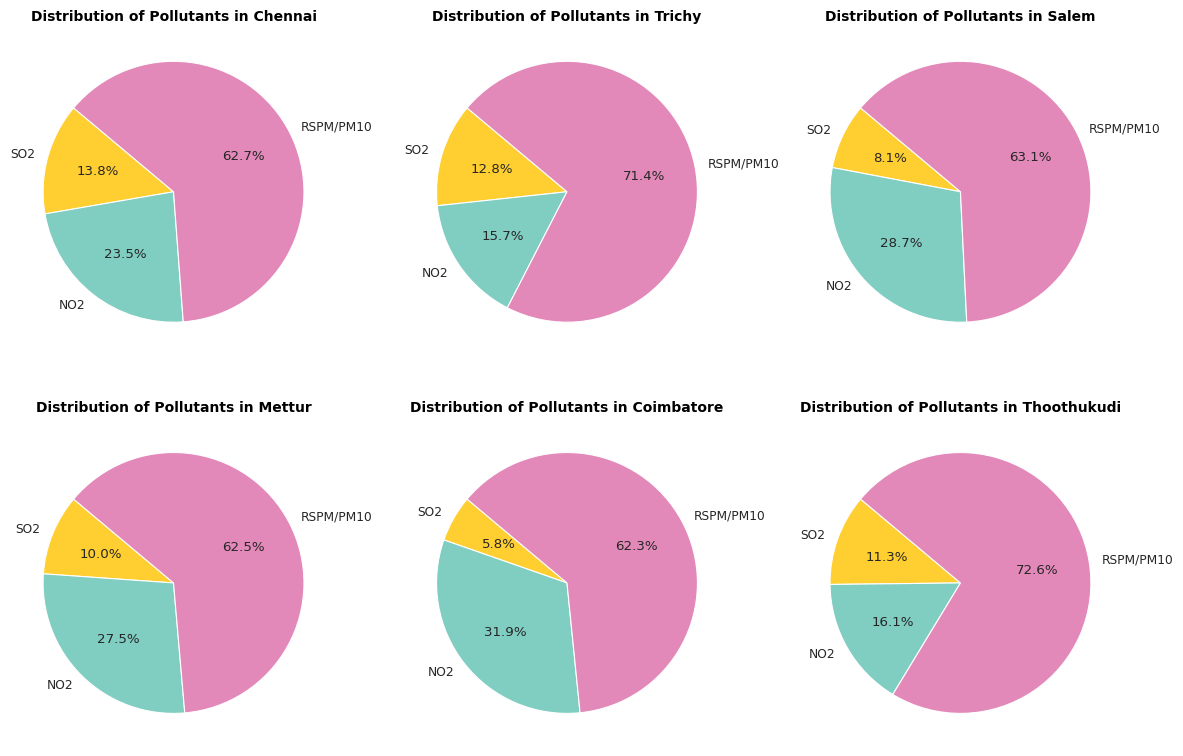

In [18]:
locations = ['Chennai', 'Trichy', 'Salem', 'Mettur', 'Coimbatore','Thoothukudi']

colors = ['#ffce30', '#80cdc1', '#e389b9']
plt.figure(figsize=(12, 8))

for location in locations:
    # Filter the data for the current location
    location_data = data[data['City/Town/Village/Area'] == location]

    # Select the relevant columns containing pollutant data
    pollutants = ['SO2', 'NO2', 'RSPM/PM10']

    # Calculate the total pollutant levels
    pollutant_totals = location_data[pollutants].sum()

    # Create a pie chart for the current location
    plt.subplot(2, 3, locations.index(location) + 1)  # Create a subplot for each location
    plt.pie(pollutant_totals, labels=pollutants, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Distribution of Pollutants in {location}',fontsize=10, fontweight='bold', color='black')
    print("\t\t")

# Adjust spacing between subplots
plt.tight_layout()

# Display all the pie charts
plt.show()


Distribution of NO2 by Area:

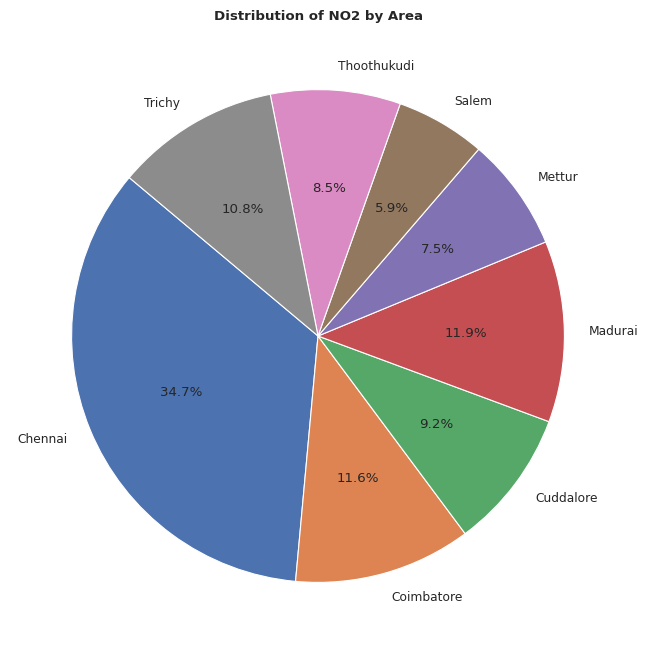

In [19]:
selected_pollutant = 'NO2'
grouped_data = data.groupby('City/Town/Village/Area')[selected_pollutant].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(grouped_data[selected_pollutant], labels=grouped_data['City/Town/Village/Area'], autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {selected_pollutant} by Area',fontweight='bold')
plt.show()

Distribution of SO2 by Area:

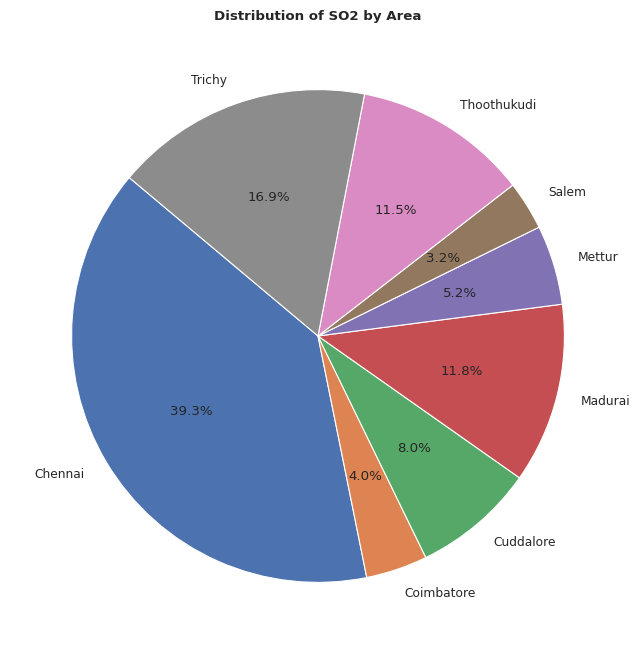

In [20]:
selected_pollutant = 'SO2'
grouped_data = data.groupby('City/Town/Village/Area')[selected_pollutant].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(grouped_data[selected_pollutant], labels=grouped_data['City/Town/Village/Area'], autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {selected_pollutant} by Area',fontweight='bold')
plt.show()

Distribution of RSPM/PM10 by Area:

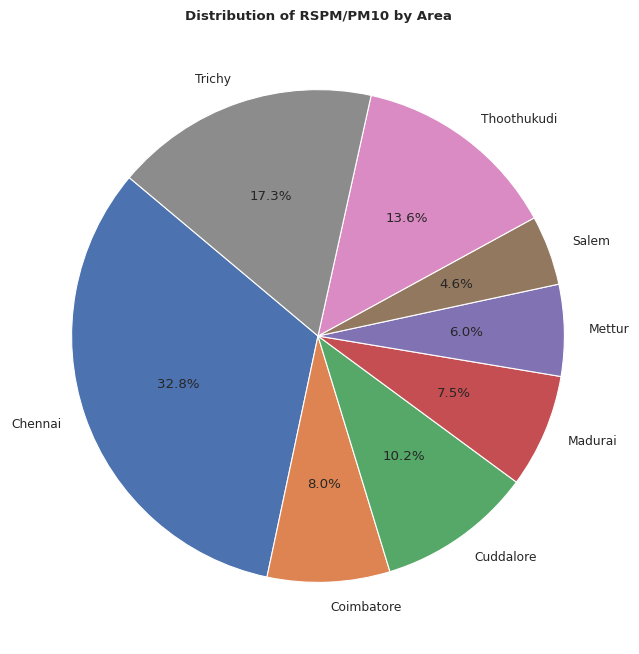

In [21]:
selected_pollutant = 'RSPM/PM10'
grouped_data = data.groupby('City/Town/Village/Area')[selected_pollutant].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(grouped_data[selected_pollutant], labels=grouped_data['City/Town/Village/Area'], autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {selected_pollutant} by Area',fontweight='bold')
plt.show()

Distribution of Pollutants by Location Type:

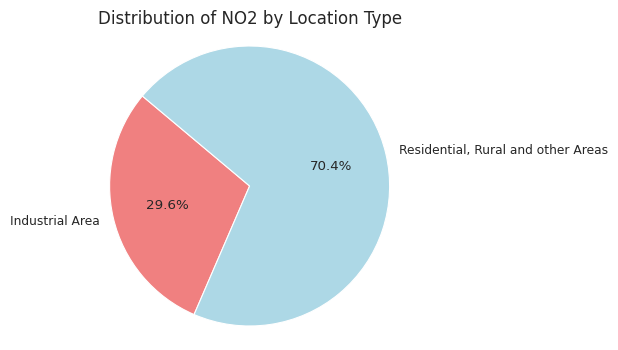

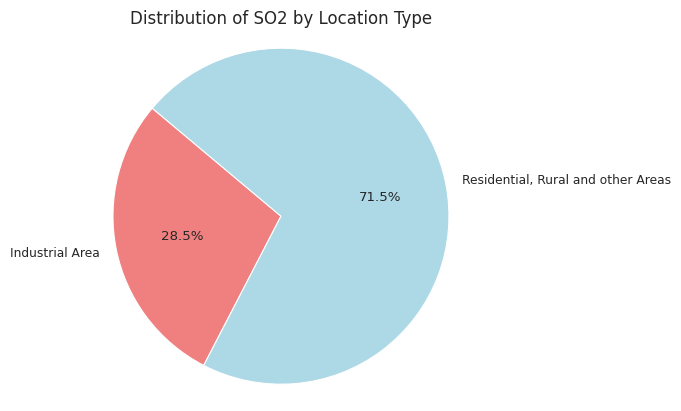

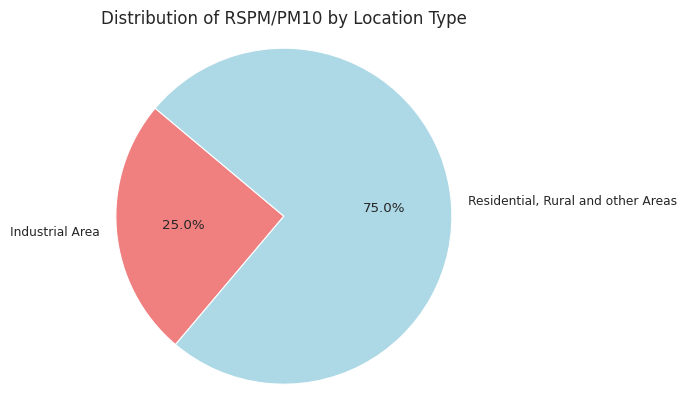

In [22]:
pollutants = ['NO2', 'SO2', 'RSPM/PM10']
type_of_location = df['TypeofLocation']
data= df[pollutants + ['TypeofLocation']]
grouped_data = data.groupby('TypeofLocation').sum()
colors = ['lightcoral', 'lightblue']
plt.figure(figsize=(6, 4))
for pollutant in pollutants:
    plt.pie(grouped_data[pollutant], labels=grouped_data.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Distribution of {pollutant} by Location Type', fontsize=12)
    plt.axis('equal')
    plt.show()

Comparison of Pollutant levels in various Monitoring Stations:

1) Chennai:

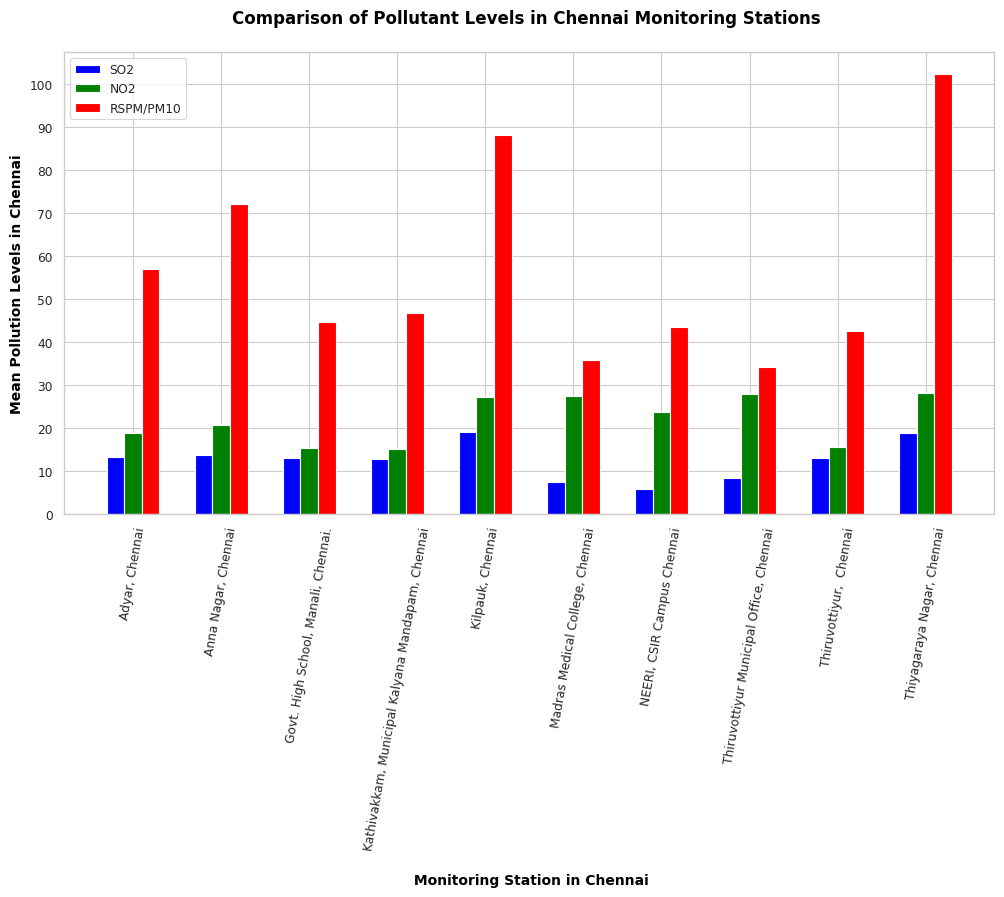

In [23]:
data=df
chennai_data = data[data['City/Town/Village/Area'] == 'Chennai']
pollutants = ['SO2', 'NO2', 'RSPM/PM10']

# Filter data for Chennai and select columns for location and pollutants
location_data = chennai_data[['Location of Monitoring Station'] + pollutants]

# Group the data by monitoring station and calculate the mean pollutant levels
grouped_data = location_data.groupby('Location of Monitoring Station').mean().reset_index()

# Create a grouped bar chart to compare pollutant levels at different monitoring stations
plt.figure(figsize=(12, 6))

# Define colors for each pollutant
colors = ['blue', 'green', 'red']

# Bar width for each group
bar_width = 0.2

# Define the x-axis positions for each group
x = range(len(grouped_data))

for i, pollutant in enumerate(pollutants):
    plt.bar(
        [pos + i * bar_width for pos in x],
        grouped_data[pollutant],
        label=pollutant,
        color=colors[i],
        width=bar_width,
    )

plt.xlabel('\n Monitoring Station in Chennai',fontsize=10, fontweight='bold', color='black')
plt.ylabel('Mean Pollution Levels in Chennai',fontsize=10, fontweight='bold', color='black')
plt.title('Comparison of Pollutant Levels in Chennai Monitoring Stations \n',fontsize=12, fontweight='bold', color='black')
plt.xticks([pos + bar_width for pos in x], grouped_data['Location of Monitoring Station'], rotation=80)
plt.legend()

plt.yticks(range(0, int(grouped_data[pollutants].max().max()) + 1, 10))

plt.show()


2) Trichy:

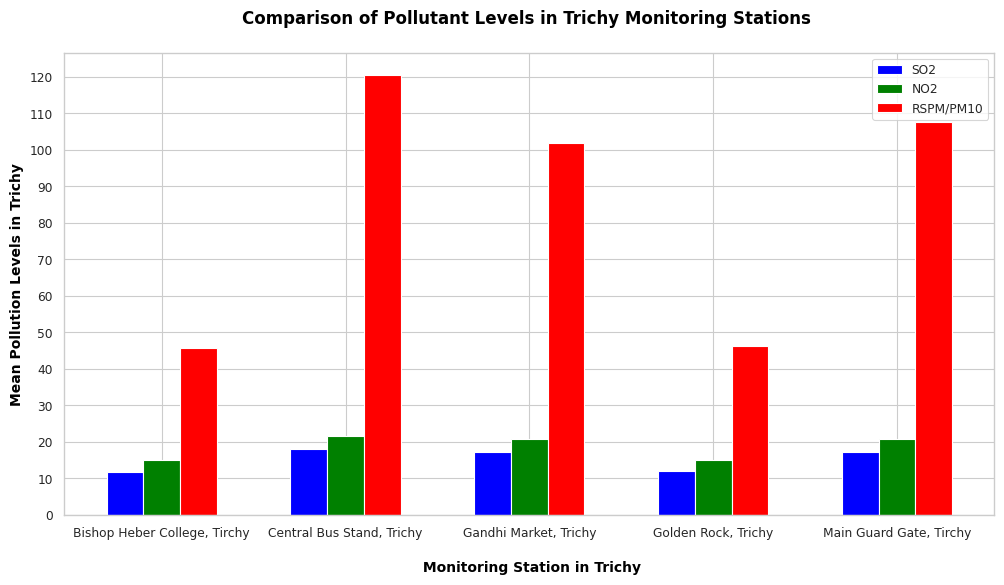

In [24]:
data=df
Trichy_data = data[data['City/Town/Village/Area'] == 'Trichy']
pollutants = ['SO2', 'NO2', 'RSPM/PM10']

# Filter data for Chennai and select columns for location and pollutants
location_data = Trichy_data[['Location of Monitoring Station'] + pollutants]

# Group the data by monitoring station and calculate the mean pollutant levels
grouped_data = location_data.groupby('Location of Monitoring Station').mean().reset_index()

# Create a grouped bar chart to compare pollutant levels at different monitoring stations
plt.figure(figsize=(12, 6))

# Define colors for each pollutant
colors = ['blue', 'green', 'red']

# Bar width for each group
bar_width = 0.2

# Define the x-axis positions for each group
x = range(len(grouped_data))

for i, pollutant in enumerate(pollutants):
    plt.bar(
        [pos + i * bar_width for pos in x],
        grouped_data[pollutant],
        label=pollutant,
        color=colors[i],
        width=bar_width,
    )

plt.xlabel('\n Monitoring Station in Trichy',fontsize=10, fontweight='bold', color='black')
plt.ylabel('Mean Pollution Levels in Trichy',fontsize=10, fontweight='bold', color='black')
plt.title('Comparison of Pollutant Levels in Trichy Monitoring Stations \n',fontsize=12, fontweight='bold', color='black')
plt.xticks([pos + bar_width for pos in x], grouped_data['Location of Monitoring Station'], rotation=0)

plt.legend()

plt.yticks(range(0, int(grouped_data[pollutants].max().max()) + 1, 10))

plt.show()

3) Madurai:

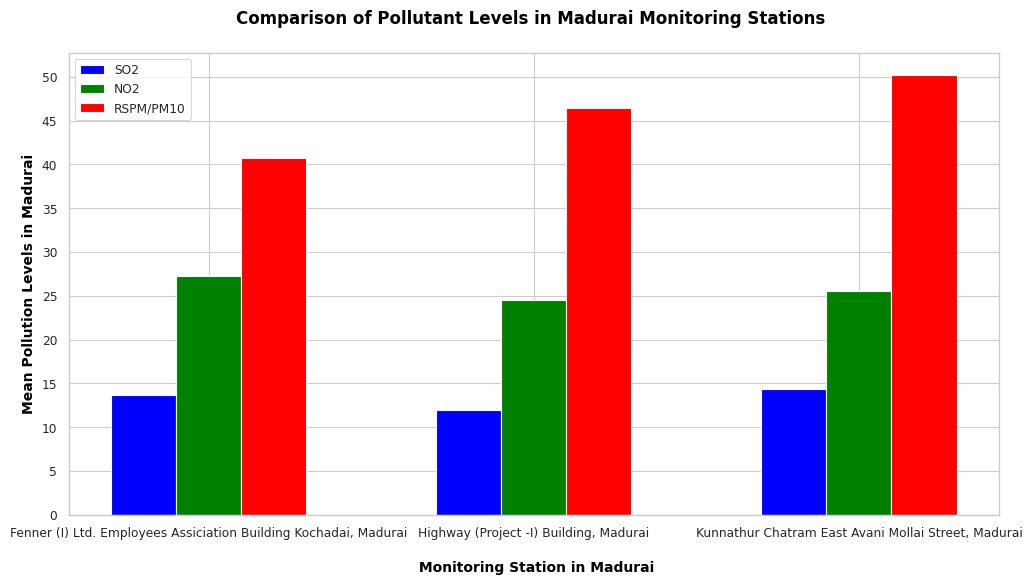

In [25]:
data=df
Madurai_data = data[data['City/Town/Village/Area'] == 'Madurai']
pollutants = ['SO2', 'NO2', 'RSPM/PM10']

# Filter data for Chennai and select columns for location and pollutants
location_data = Madurai_data[['Location of Monitoring Station'] + pollutants]

# Group the data by monitoring station and calculate the mean pollutant levels
grouped_data = location_data.groupby('Location of Monitoring Station').mean().reset_index()

# Create a grouped bar chart to compare pollutant levels at different monitoring stations
plt.figure(figsize=(12, 6))

# Define colors for each pollutant
colors = ['blue', 'green', 'red']

# Bar width for each group
bar_width = 0.2

# Define the x-axis positions for each group
x = range(len(grouped_data))

for i, pollutant in enumerate(pollutants):
    plt.bar(
        [pos + i * bar_width for pos in x],
        grouped_data[pollutant],
        label=pollutant,
        color=colors[i],
        width=bar_width,
    )

plt.xlabel('\n Monitoring Station in Madurai',fontsize=10, fontweight='bold', color='black')
plt.ylabel('Mean Pollution Levels in Madurai',fontsize=10, fontweight='bold', color='black')
plt.title('Comparison of Pollutant Levels in Madurai Monitoring Stations \n',fontsize=12, fontweight='bold', color='black')
plt.xticks([pos + bar_width for pos in x], grouped_data['Location of Monitoring Station'],rotation=0)
plt.legend()

plt.yticks(range(0, int(grouped_data[pollutants].max().max()) + 1, 5))

plt.show()

4) Coimbatore:

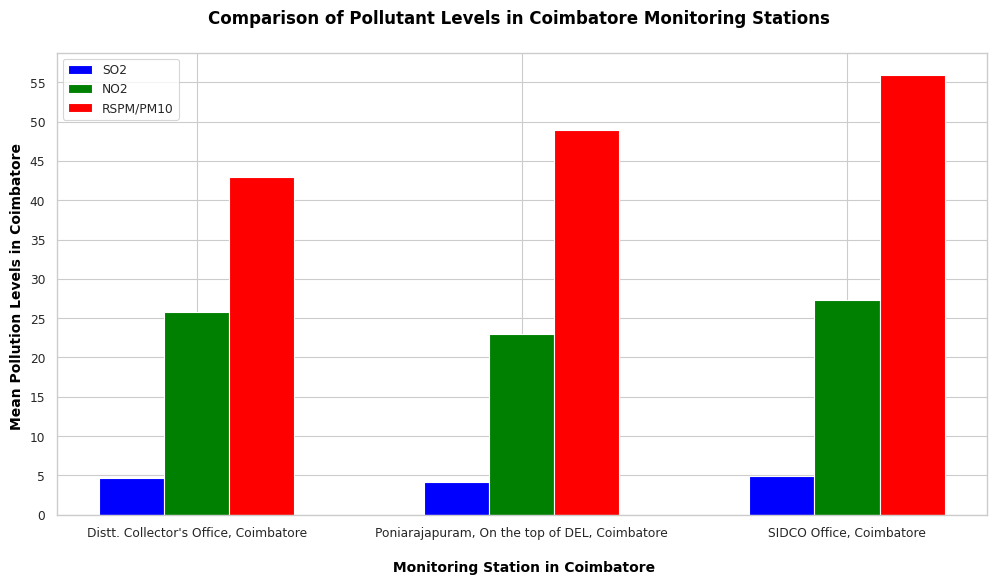

In [26]:
data=df
coimbatore_data = data[data['City/Town/Village/Area'] == 'Coimbatore']
pollutants = ['SO2', 'NO2', 'RSPM/PM10']

# Filter data for Chennai and select columns for location and pollutants
location_data = coimbatore_data[['Location of Monitoring Station'] + pollutants]

# Group the data by monitoring station and calculate the mean pollutant levels
grouped_data = location_data.groupby('Location of Monitoring Station').mean().reset_index()

# Create a grouped bar chart to compare pollutant levels at different monitoring stations
plt.figure(figsize=(12, 6))

# Define colors for each pollutant
colors = ['blue', 'green', 'red']

# Bar width for each group
bar_width = 0.2

# Define the x-axis positions for each group
x = range(len(grouped_data))

for i, pollutant in enumerate(pollutants):
    plt.bar(
        [pos + i * bar_width for pos in x],
        grouped_data[pollutant],
        label=pollutant,
        color=colors[i],
        width=bar_width,
    )

plt.xlabel('\n Monitoring Station in Coimbatore',fontsize=10, fontweight='bold', color='black')
plt.ylabel('Mean Pollution Levels in Coimbatore ',fontsize=10, fontweight='bold', color='black')
plt.title('Comparison of Pollutant Levels in Coimbatore Monitoring Stations \n',fontsize=12, fontweight='bold', color='black')
plt.xticks([pos + bar_width for pos in x], grouped_data['Location of Monitoring Station'], rotation=0)


plt.legend()

plt.yticks(range(0, int(grouped_data[pollutants].max().max()) + 1, 5))

plt.show()

Correlation between Pollutions:

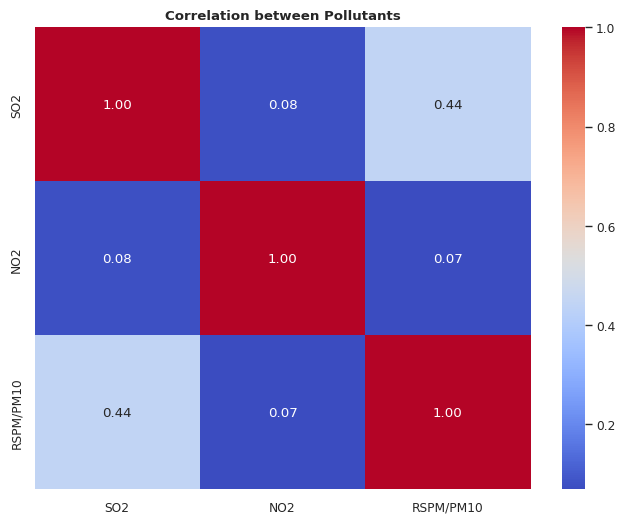

In [27]:
# Calculate the correlation matrix
correlation_matrix = data[['SO2', 'NO2', 'RSPM/PM10']].corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Pollutants',fontweight='bold')
plt.show()



Pollutant Levels Over Time at Kathivakkam, Chennai:

<ipython-input-28-23732d82e4da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['Sampling Date'] = pd.to_datetime(location_data['Sampling Date'], format='%d-%m-%y')


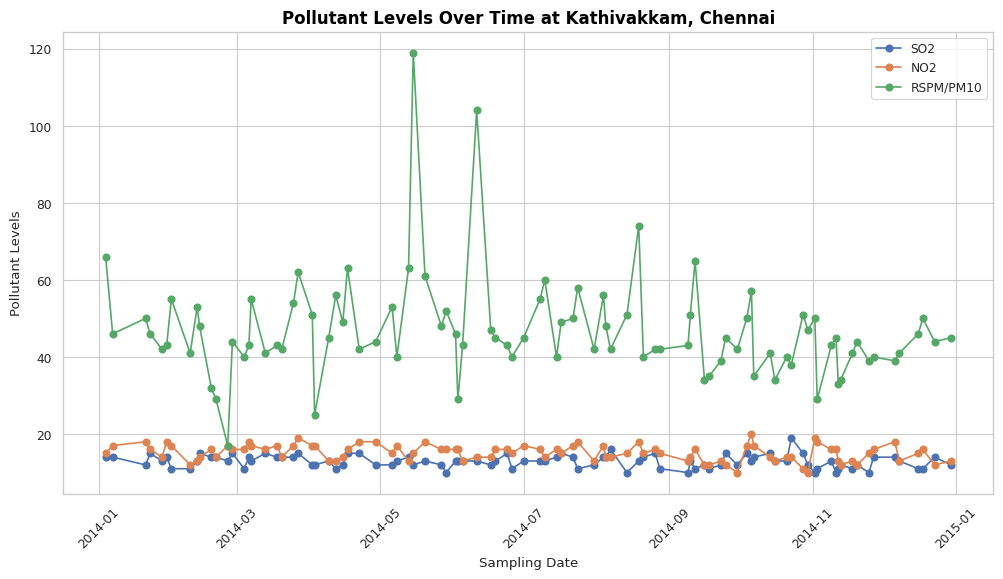

In [28]:
# Filter the data for the specific location
location_data = df[df['Location of Monitoring Station'] == 'Kathivakkam, Municipal Kalyana Mandapam, Chennai']

# Convert the 'Sampling Date' column to a datetime format
location_data['Sampling Date'] = pd.to_datetime(location_data['Sampling Date'], format='%d-%m-%y')

# Sort the data by 'Sampling Date'
location_data = location_data.sort_values('Sampling Date')

# Create line plots to visualize pollutant levels over time
plt.figure(figsize=(12, 6))
plt.plot(location_data['Sampling Date'], location_data['SO2'], marker='o', linestyle='-', label='SO2')
plt.plot(location_data['Sampling Date'], location_data['NO2'], marker='o', linestyle='-', label='NO2')
plt.plot(location_data['Sampling Date'], location_data['RSPM/PM10'], marker='o', linestyle='-', label='RSPM/PM10')
plt.xlabel('Sampling Date')
plt.ylabel('Pollutant Levels')
plt.title('Pollutant Levels Over Time at Kathivakkam, Chennai', fontsize=12, fontweight='bold', color='black')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


Pollutant Levels Over Time at SIDCO Office, Coimbatore

<ipython-input-29-941cd53c089f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['Sampling Date'] = pd.to_datetime(location_data['Sampling Date'], format='%d-%m-%y')


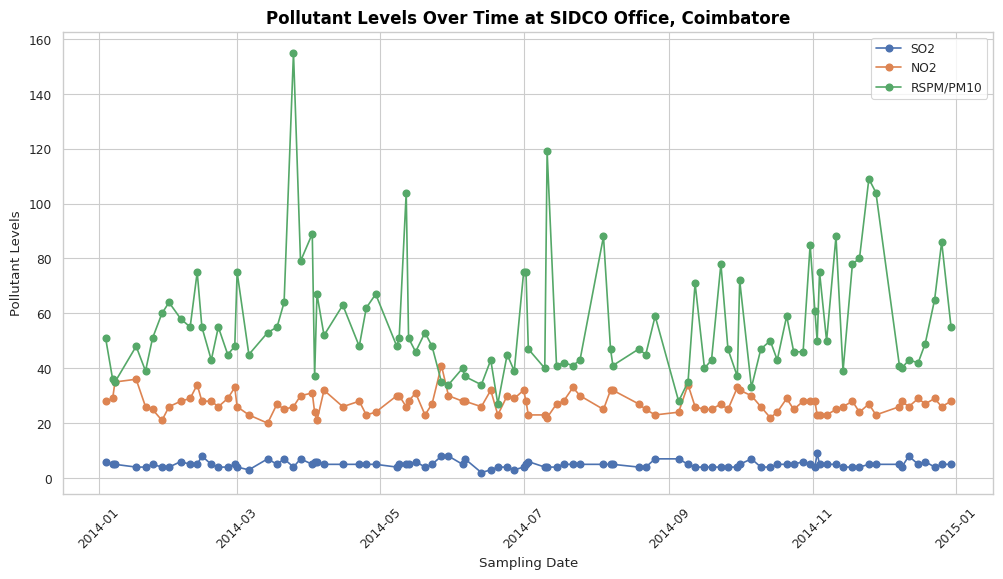

In [29]:
# Filter the data for the specific location
location_data = df[df['Location of Monitoring Station'] =='SIDCO Office, Coimbatore']

# Convert the 'Sampling Date' column to a datetime format
location_data['Sampling Date'] = pd.to_datetime(location_data['Sampling Date'], format='%d-%m-%y')

# Sort the data by 'Sampling Date'
location_data = location_data.sort_values('Sampling Date')

# Create line plots to visualize pollutant levels over time
plt.figure(figsize=(12, 6))
plt.plot(location_data['Sampling Date'], location_data['SO2'], marker='o', linestyle='-', label='SO2')
plt.plot(location_data['Sampling Date'], location_data['NO2'], marker='o', linestyle='-', label='NO2')
plt.plot(location_data['Sampling Date'], location_data['RSPM/PM10'], marker='o', linestyle='-', label='RSPM/PM10')
plt.xlabel('Sampling Date')
plt.ylabel('Pollutant Levels')
plt.title('Pollutant Levels Over Time at SIDCO Office, Coimbatore', fontsize=12, fontweight='bold', color='black')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


Pollutant Levels Over Time at Raman Nagar, Mettur

<ipython-input-30-c461745bc537>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['Sampling Date'] = pd.to_datetime(location_data['Sampling Date'], format='%d-%m-%y')


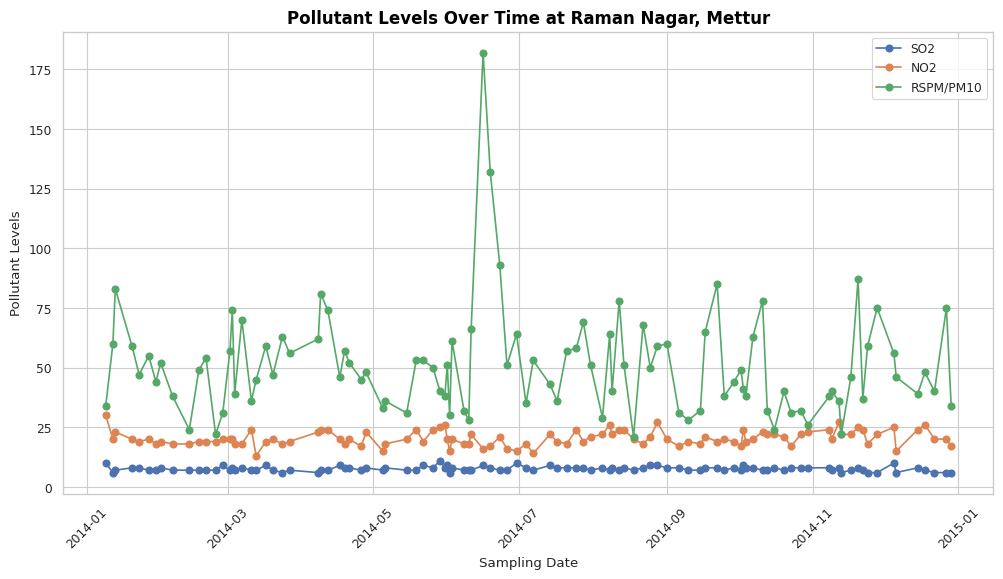

In [30]:
# Filter the data for the specific location
location_data = df[df['Location of Monitoring Station'] =='Raman Nagar, Mettur']

# Convert the 'Sampling Date' column to a datetime format
location_data['Sampling Date'] = pd.to_datetime(location_data['Sampling Date'], format='%d-%m-%y')

# Sort the data by 'Sampling Date'
location_data = location_data.sort_values('Sampling Date')

# Create line plots to visualize pollutant levels over time
plt.figure(figsize=(12, 6))
plt.plot(location_data['Sampling Date'], location_data['SO2'], marker='o', linestyle='-', label='SO2')
plt.plot(location_data['Sampling Date'], location_data['NO2'], marker='o', linestyle='-', label='NO2')
plt.plot(location_data['Sampling Date'], location_data['RSPM/PM10'], marker='o', linestyle='-', label='RSPM/PM10')
plt.xlabel('Sampling Date')
plt.ylabel('Pollutant Levels')
plt.title('Pollutant Levels Over Time at Raman Nagar, Mettur', fontsize=12, fontweight='bold', color='black')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


# ML model:

In [31]:
# Calculate the mean values of pollutant levels in DataFrame
so2_mean = df['SO2'].mean()
no2_mean = df['NO2'].mean()
rspm_mean = df['RSPM/PM10'].mean()

# Define a function to categorize air quality into three categories
def categorize_air_quality(row):
    if row['SO2'] < so2_mean and row['NO2'] < no2_mean and row['RSPM/PM10'] < rspm_mean:
        return 'Good'
    elif row['SO2'] < 2 * so2_mean and row['NO2'] < 2 * no2_mean and row['RSPM/PM10'] < 2 * rspm_mean:
        return 'Moderate'
    else:
        return 'Poor'

# Apply the categorization function to each row and create the new column
df['AirQualityCategory'] = df.apply(categorize_air_quality, axis=1)


Accuracy: 0.84
              precision    recall  f1-score   support

        Good       0.64      0.74      0.69       122
    Moderate       0.91      0.88      0.89       415
        Poor       0.86      0.77      0.81        39

    accuracy                           0.84       576
   macro avg       0.80      0.79      0.80       576
weighted avg       0.85      0.84      0.84       576



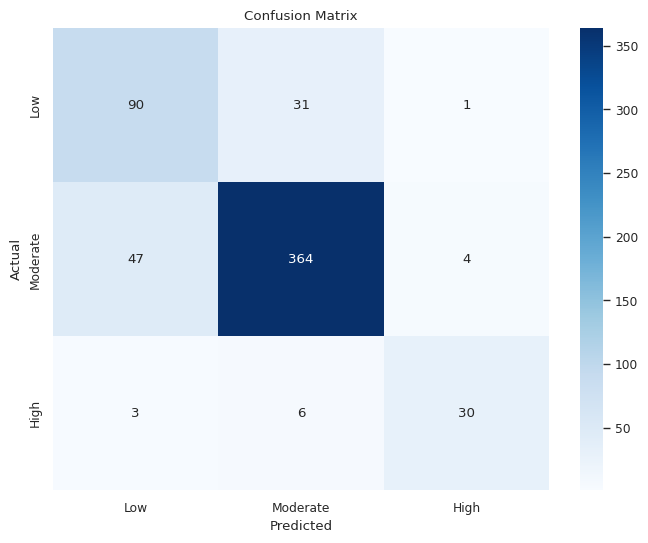

In [32]:
# Define features and target variable
X = df[['SO2','RSPM/PM10']]
y = df['AirQualityCategory']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Moderate', 'High'],
            yticklabels=['Low', 'Moderate', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.90
              precision    recall  f1-score   support

        Good       0.84      0.93      0.88       122
    Moderate       0.92      0.94      0.93       415
        Poor       0.93      0.36      0.52        39

    accuracy                           0.90       576
   macro avg       0.90      0.74      0.78       576
weighted avg       0.90      0.90      0.89       576



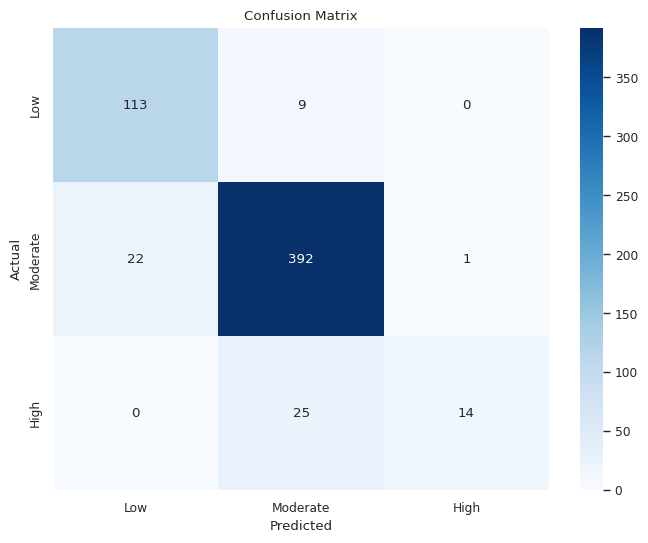

In [33]:
X = df[['SO2', 'NO2']]
y = df['AirQualityCategory']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Moderate', 'High'],
            yticklabels=['Low', 'Moderate', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.82
              precision    recall  f1-score   support

        Good       0.60      0.55      0.58       122
    Moderate       0.86      0.89      0.87       415
        Poor       0.94      0.87      0.91        39

    accuracy                           0.82       576
   macro avg       0.80      0.77      0.79       576
weighted avg       0.81      0.82      0.81       576



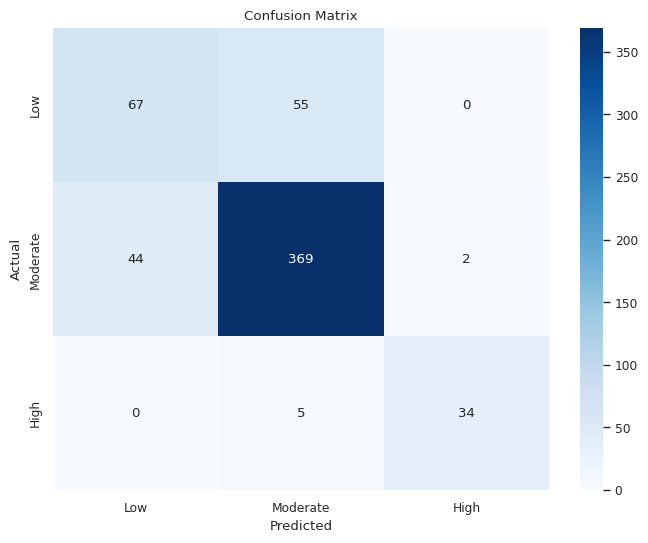

In [34]:
X = df[[ 'NO2', 'RSPM/PM10']]
y = df['AirQualityCategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Moderate', 'High'],
            yticklabels=['Low', 'Moderate', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
